# Life Expectancy and GDP

The goal of this project is to explore the relationship between GDP and life expectancy

# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/all_data.csv')
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [45]:
data = data.rename(columns={'Life expectancy at birth (years)':'Life_Expectancy'})
data.head()

,Country,Year,Life_Expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [46]:
countries = list(data['Country'].unique())
print(f'{len(countries)} countries:')
print(countries)

6 countries:
['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']


In [47]:
year_df = pd.DataFrame(data.groupby('Year').mean(numeric_only=True))
year_df.head()

,Life_Expectancy,GDP
Year,,
2000,70.766667,2.371583e+12
2001,70.833333,2.448752e+12
2002,70.950000,2.561221e+12
2003,71.033333,2.743446e+12
2004,71.300000,2.991647e+12


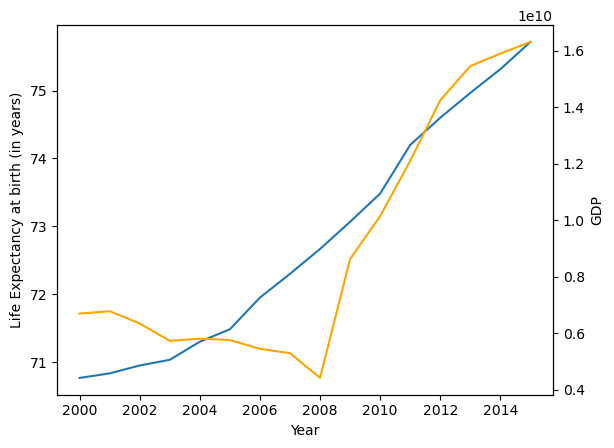

In [52]:
sns.lineplot(data=year_df, x=year_df.index, y='Life_Expectancy')
plt.ylabel('Life Expectancy at birth (in years)')
ax2 = plt.twinx()
sns.lineplot(data=data[data['Country']==country], x='Year', y='GDP', ax=ax2, color='orange');

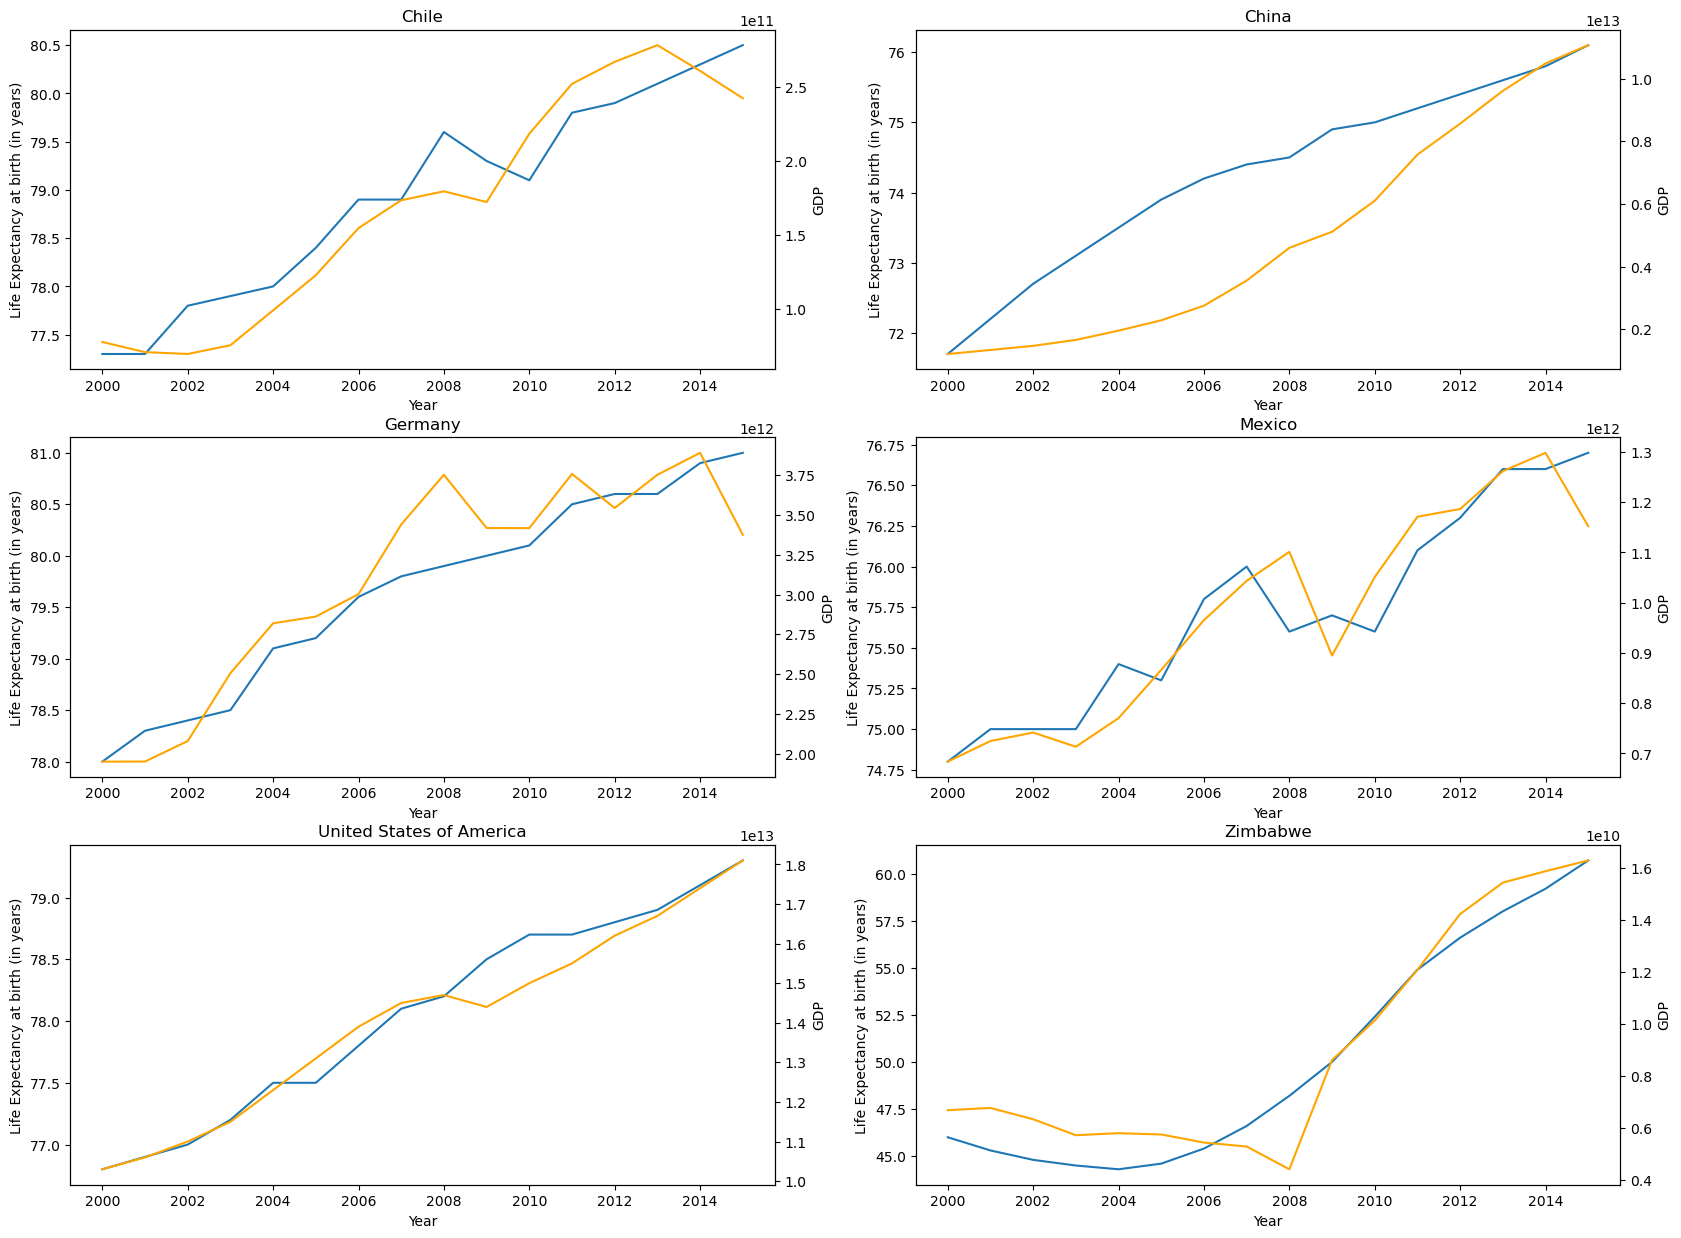

In [50]:
plt.figure(figsize=(20, 15))
rows = 3
cols = 2
n = rows * cols
for i, country in enumerate(countries):
    plt.subplot(rows, cols, i+1)
    plt.title(country)
    sns.lineplot(data=data[data['Country']==country], x='Year', y='Life_Expectancy')
    plt.ylabel('Life Expectancy at birth (in years)')
    ax2 = plt.twinx()
    sns.lineplot(data=data[data['Country']==country], x='Year', y='GDP', ax=ax2, color='orange')

## Countries' Life Expectancy at birth (in years)

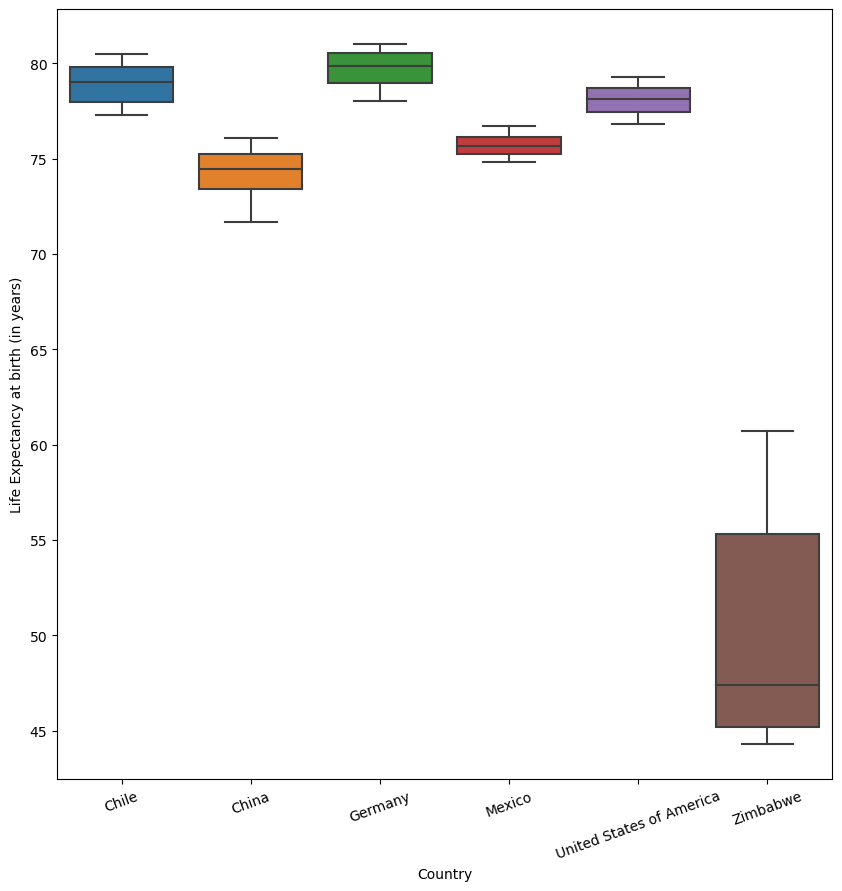

In [43]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=data, x="Country", y="Life_Expectancy")
plt.ylabel('Life Expectancy at birth (in years)')
plt.xticks(rotation=20);

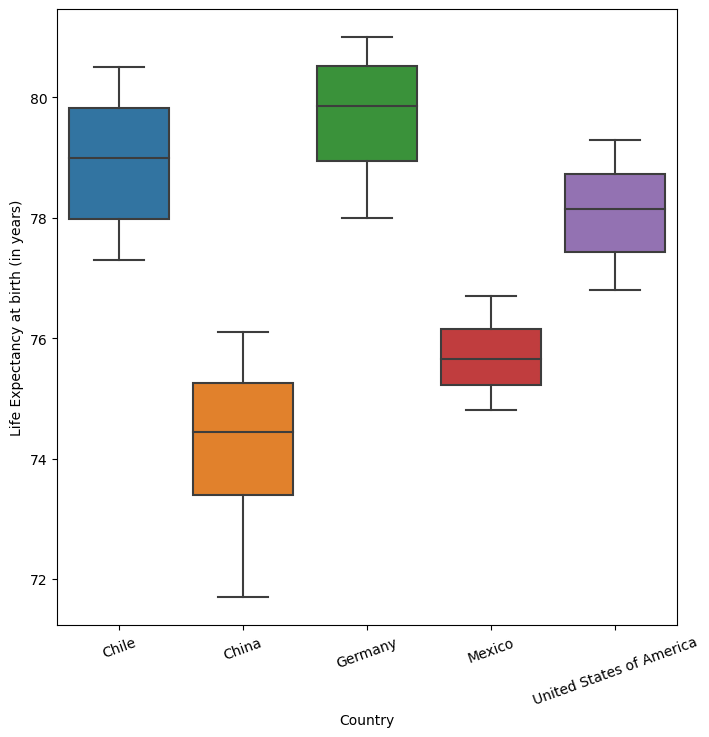

In [39]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=data[data['Country']!='Zimbabwe'], x="Country", y="Life_Expectancy")
plt.ylabel('Life Expectancy at birth (in years)')
plt.xticks(rotation=20);

In [ ]:
# Plot two lines with different scales on the same plot
fig = plt.figure(figsize=(8, 5))
line_weight = 3
alpha = .5
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
# This is the magic that joins the x-axis
ax2 = ax1.twinx()
lns1 = ax1.plot(wnv3['mosq'], color='blue', lw=line_weight, alpha=alpha, label='Mosquitos')
lns2 = ax2.plot(wnv3['wnv'], color='orange', lw=line_weight, alpha=alpha, label='Westnile')
# Solution for having two legends
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=0)
plt.title('Cumulative yearly mosquito & West Nile levels', fontsize=20)
        
plt.show()


plt.figure(figsize=(20, 15))
rows = 3
cols = 2
n = rows * cols
for i, country in enumerate(countries):
    plt.subplot(rows, cols, i+1)
    plt.title(country)
    sns.lineplot(data=data[data['Country']==country], x='Year', y='Life expectancy at birth (years)')
    #plt.legend(loc=0)
    ax2 = plt.twinx()
    sns.lineplot(data=data[data['Country']==country], x='Year', y='GDP', ax=ax2, color='orange')
    #ax2.legend(loc=0)